# X-ray Body Part Classifier

In [42]:
import os

import numpy as np
import pandas as pd

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

### Loading the index

In [14]:
df = pd.read_csv('train_df.csv')
df

,SOPInstanceUID,Target,MultiImageType,ImageType,ImageType1,InstanceCreationDate,InstanceCreationTime,SOPClassUID,StudyDate,SeriesDate,...,WindowWidth,ImageType2,KVP,DistanceSourceToDetector,DistanceSourceToPatient,ExposureTime,XRayTubeCurrent,AcquisitionNumber,ImageType3,image_path
0,1.2.826.0.1.3680043.8.498.10025629581362719970...,0,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.10025...
1,1.2.826.0.1.3680043.8.498.10036150326276641158...,15,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.10036...
2,1.2.826.0.1.3680043.8.498.10038426859954986240...,12,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.10038...
3,1.2.826.0.1.3680043.8.498.10050991192143676483...,14,NaN,NaN,NaN,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.10050...
4,1.2.826.0.1.3680043.8.498.10053309524595490852...,3,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.10053...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,1.2.826.0.1.3680043.8.498.99711016467406172920...,14,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.99711...
1734,1.2.826.0.1.3680043.8.498.99727280485333900933...,11,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.99727...
1735,1.2.826.0.1.3680043.8.498.99935008698914755885...,3,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.99935...
1736,1.2.826.0.1.3680043.8.498.99969671777553755311...,2,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.99969...


### Sorting the images

In [3]:
import shutil
labels = [
    'Abdomen',
    'Ankle',
    'Cervical Spine',
    'Chest',
    'Clavicles',
    'Elbow',
    'Feet',
    'Finger',
    'Forearm',
    'Hand',
    'Hip',
    'Knee',
    'Lower Leg',
    'Lumbar Spine',
    'Others',
    'Pelvis',
    'Shoulder',
    'Sinus',
    'Skull',
    'Thigh',
    'Thoracic Spine',
    'Wrist'
]
def sort_data(row):
    try:
        os.makedirs(f'sorted/{labels[int(row["Target"])]}', exist_ok=True)
        shutil.copy(f'{row["image_path"]}', f'sorted/{labels[int(row["Target"])]}/')
    except ValueError:
        pass

df.apply(sort_data, axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
1733    None
1734    None
1735    None
1736    None
1737    None
Length: 1738, dtype: object

### Loading the data

In [4]:
data = DataLoader.from_folder('sorted')
train_data, validation_data = data.split(0.9)

INFO:tensorflow:Load image with size: 1606, num_label: 22, labels: Abdomen, Ankle, Cervical Spine, Chest, Clavicles, Elbow, Feet, Finger, Forearm, Hand, Hip, Knee, Lower Leg, Lumbar Spine, Others, Pelvis, Shoulder, Sinus, Skull, Thigh, Thoracic Spine, Wrist.


### Training

In [5]:
model = image_classifier.create(train_data, model_spec=model_spec.get('efficientnet_lite3'), validation_data=validation_data, epochs=10)

model.export(export_dir='.')

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             6992768   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 22)                28182     
                                                                 
Total params: 7,020,950
Trainable params: 28,182
Non-trainable params: 6,992,768
_________________________________________________________________
None
Epoch 1/10


C:\Users\nukleari\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


45/45 [==============================] - 12s 166ms/step - loss: 2.0250 - accuracy: 0.5583 - val_loss: 1.3930 - val_accuracy: 0.7826
Epoch 2/10
45/45 [==============================] - 6s 122ms/step - loss: 1.3274 - accuracy: 0.7806 - val_loss: 1.2013 - val_accuracy: 0.8199
Epoch 3/10
45/45 [==============================] - 5s 114ms/step - loss: 1.1737 - accuracy: 0.8403 - val_loss: 1.1114 - val_accuracy: 0.8385
Epoch 4/10
45/45 [==============================] - 5s 113ms/step - loss: 1.0809 - accuracy: 0.8611 - val_loss: 1.0601 - val_accuracy: 0.8447
Epoch 5/10
45/45 [==============================] - 5s 114ms/step - loss: 1.0232 - accuracy: 0.8840 - val_loss: 1.0241 - val_accuracy: 0.8758
Epoch 6/10
45/45 [==============================] - 5s 118ms/step - loss: 0.9710 - accuracy: 0.9042 - val_loss: 0.9992 - val_accuracy: 0.8944
Epoch 7/10
45/45 [==============================] - 5s 114ms/step - loss: 0.9543 - accuracy: 0.9042 - val_loss: 0.9830 - val_accuracy: 0.8944
Epoch 8/10
45/45

INFO:tensorflow:Assets written to: C:\Users\nukleari\AppData\Local\Temp\tmpncruuc9g\assets
C:\Users\nukleari\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\lite\python\convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in C:\Users\nukleari\AppData\Local\Temp\tmpj0vwsp_t\labels.txt


INFO:tensorflow:Saving labels in C:\Users\nukleari\AppData\Local\Temp\tmpj0vwsp_t\labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: .\model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: .\model.tflite


## Using the classifier

In [47]:
import cv2
import tensorflow.lite as tflite
import zipfile

modelpath = 'model.tflite'

# get labels from model metadata
zip = zipfile.ZipFile(modelpath)
label_file = zip.read('labels.txt')
labels = label_file.decode("utf-8").splitlines()

# Load TFLite model and allocate tensors.
interpreter = tflite.Interpreter(model_path=modelpath)
#allocate the tensors
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_shape = input_details[0]['shape']
input_index = input_details[0]["index"]

In [48]:
def predict(image):
    resized_img = cv2.resize(image,(input_shape[1], input_shape[2]))
    input_tensor= np.array(np.expand_dims(resized_img,0))

    interpreter.set_tensor(input_index, input_tensor)
    interpreter.invoke()

    output_data = interpreter.get_tensor(output_details[0]['index'])
    pred = np.squeeze(output_data)

    return (pred.argmax(), pred.max()/255)

### Testing

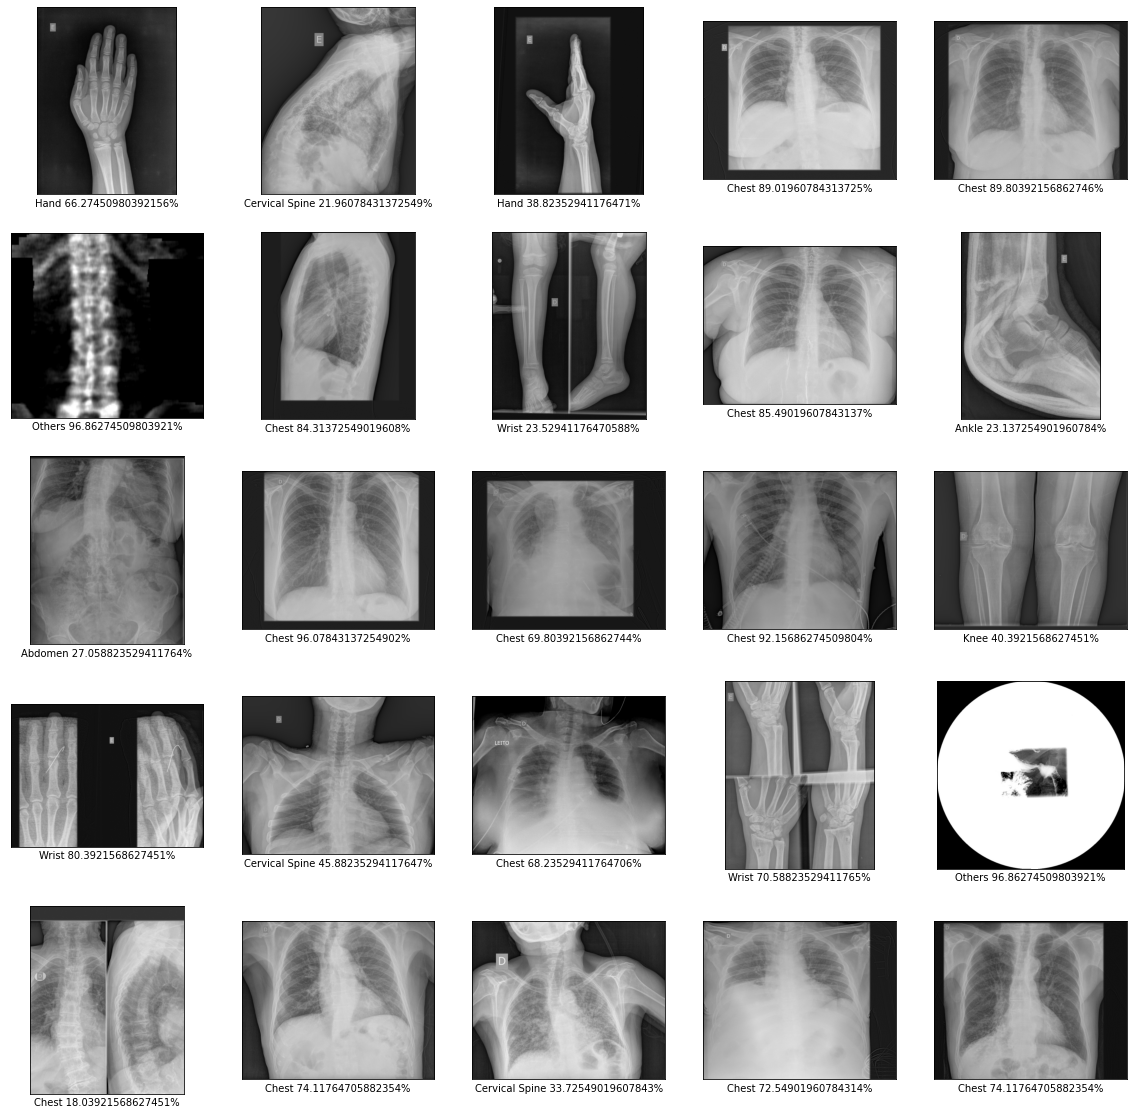

In [39]:
test_df = pd.read_csv('test_df.csv')

columns = 5
rows = 5
fig = plt.figure(figsize=(20, 20))
for index, row in test_df.iterrows():
    if index + 1 > columns * rows:
        break
    image = cv2.imread(row['image_path'])
    predict_class, accuraccy = predict(image)
    ax = plt.subplot(rows, columns, index + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.gray)

    plt.xlabel(f'{labels[predict_class]} {accuraccy * 100}%')
plt.show()